In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
oil_data = pd.read_csv("oil.csv")
holiday_data = pd.read_csv("holidays_events.csv")
store_data = pd.read_csv("stores.csv")
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
transaction_data = pd.read_csv("transactions.csv")
sample = pd.read_csv('sample_submission.csv')

In [3]:
test_data

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [4]:
train_data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [5]:
train_data.isna().sum() # no data is missing

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [6]:
test_data.isna().sum() # no data is missing

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [7]:
train_data.family.nunique() # there are 33 family of product

33

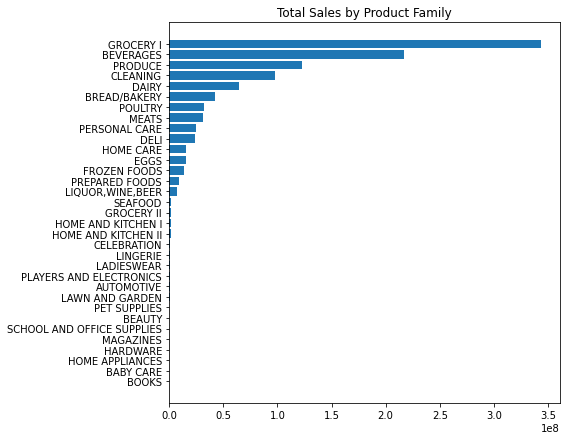

In [8]:
train = train_data.copy()
family = train.groupby('family').sales.sum() #group by family

fig, ax = plt.subplots(figsize=(7,7))
plt.barh(family.groupby('family').sum().sort_values().index, family.groupby('family').sum().sort_values())
ax.set(title='Total Sales by Product Family')
plt.show()

In [9]:
total = family.sum()
proportion = ((family/total)*100).sort_values(ascending=False)
proportion = pd.DataFrame(proportion)
proportion.head(10)

,sales
family,
GROCERY I,31.990346
BEVERAGES,20.207284
PRODUCE,11.428795
CLEANING,9.083197
DAIRY,6.006428
BREAD/BAKERY,3.924384
POULTRY,2.968952
MEATS,2.895414
PERSONAL CARE,2.290520


nearly 80% of sales are [GROCERY I, BEVERAGES, PRODUCE, CLEANING, DAIRY] 

In [10]:
train_data.store_nbr.nunique() #There are 54 stores 

54

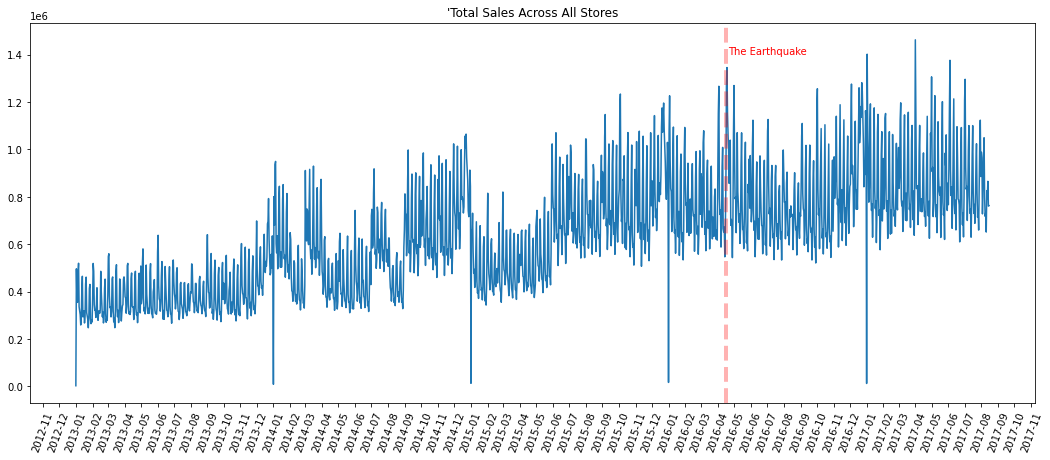

In [11]:
train['date'] = pd.to_datetime(train['date'])
train = train.set_index('date')
train = train.drop('id',axis = 1)

fig, ax = plt.subplots(figsize=(18, 7))
ax.set(title="'Total Sales Across All Stores")
total_sales = train.sales.groupby("date").sum()
plt.plot(total_sales)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=70)
plt.axvline(x=pd.Timestamp('2016-04-16'),color='r',linestyle='--',linewidth=4,alpha=0.3)
plt.text(pd.Timestamp('2016-04-20'),1400000,'The Earthquake',rotation=360,c='r')


plt.show()

In [12]:
train.groupby('date').sales.sum().sort_values().head(20)

date
2013-01-01      2511.618999
2014-01-01      8602.065404
2017-01-01     12082.500997
2015-01-01     12773.616980
2016-01-01     16433.394000
2013-01-24    247245.690995
2013-03-14    247541.420096
2013-01-10    258982.003049
2013-01-29    264488.818076
2013-06-27    266525.458966
2013-01-17    267498.515975
2013-02-21    267711.109016
2013-04-25    268790.618996
2013-03-21    269130.127953
2013-02-26    270425.007067
2013-01-31    271254.217996
2013-03-12    271823.378010
2013-09-26    273057.879859
2013-03-26    275818.235900
2013-10-24    276059.080003
Name: sales, dtype: float64

In [13]:
oil_data

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


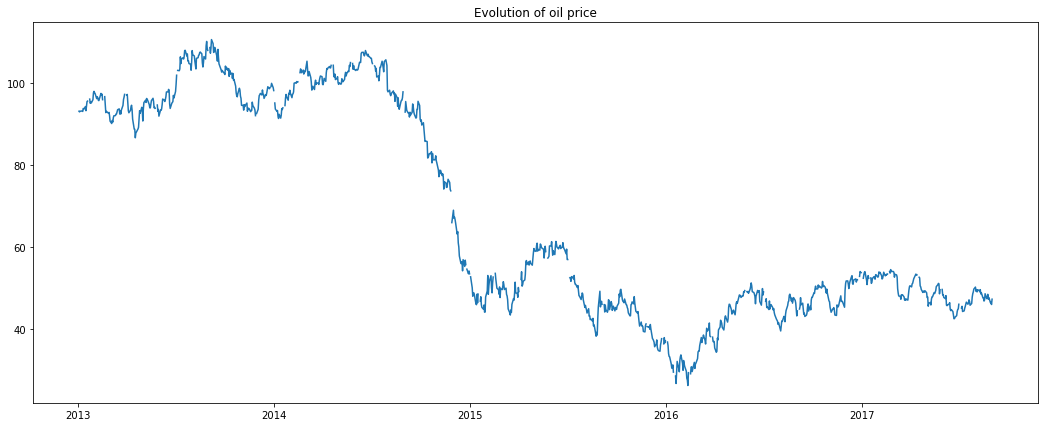

In [14]:
oil_data['date'] = pd.to_datetime(oil_data['date'])

fig, ax = plt.subplots(figsize=(18, 7))

ax.set(title="Evolution of oil price")
x = np.array(oil_data['date'])
y = np.array(oil_data['dcoilwtico'])

plt.plot(x, y);

In [15]:
holiday_data

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [16]:
store_data.head(10)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [17]:
transaction_data

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [18]:
train = train_data.copy()
train['date'] = pd.to_datetime(train['date'])
train = train.set_index('date')
train = train.drop('id',axis = 1)
train

,store_nbr,family,sales,onpromotion
date,,,,
2013-01-01,1,AUTOMOTIVE,0.000,0
2013-01-01,1,BABY CARE,0.000,0
2013-01-01,1,BEAUTY,0.000,0
2013-01-01,1,BEVERAGES,0.000,0
2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...
2017-08-15,9,POULTRY,438.133,0
2017-08-15,9,PREPARED FOODS,154.553,1
2017-08-15,9,PRODUCE,2419.729,148


In [19]:
date_fam_sale = train.groupby(['date','family']).sum().sales
unstack = date_fam_sale.unstack()
unstack = unstack.resample('1M').sum()

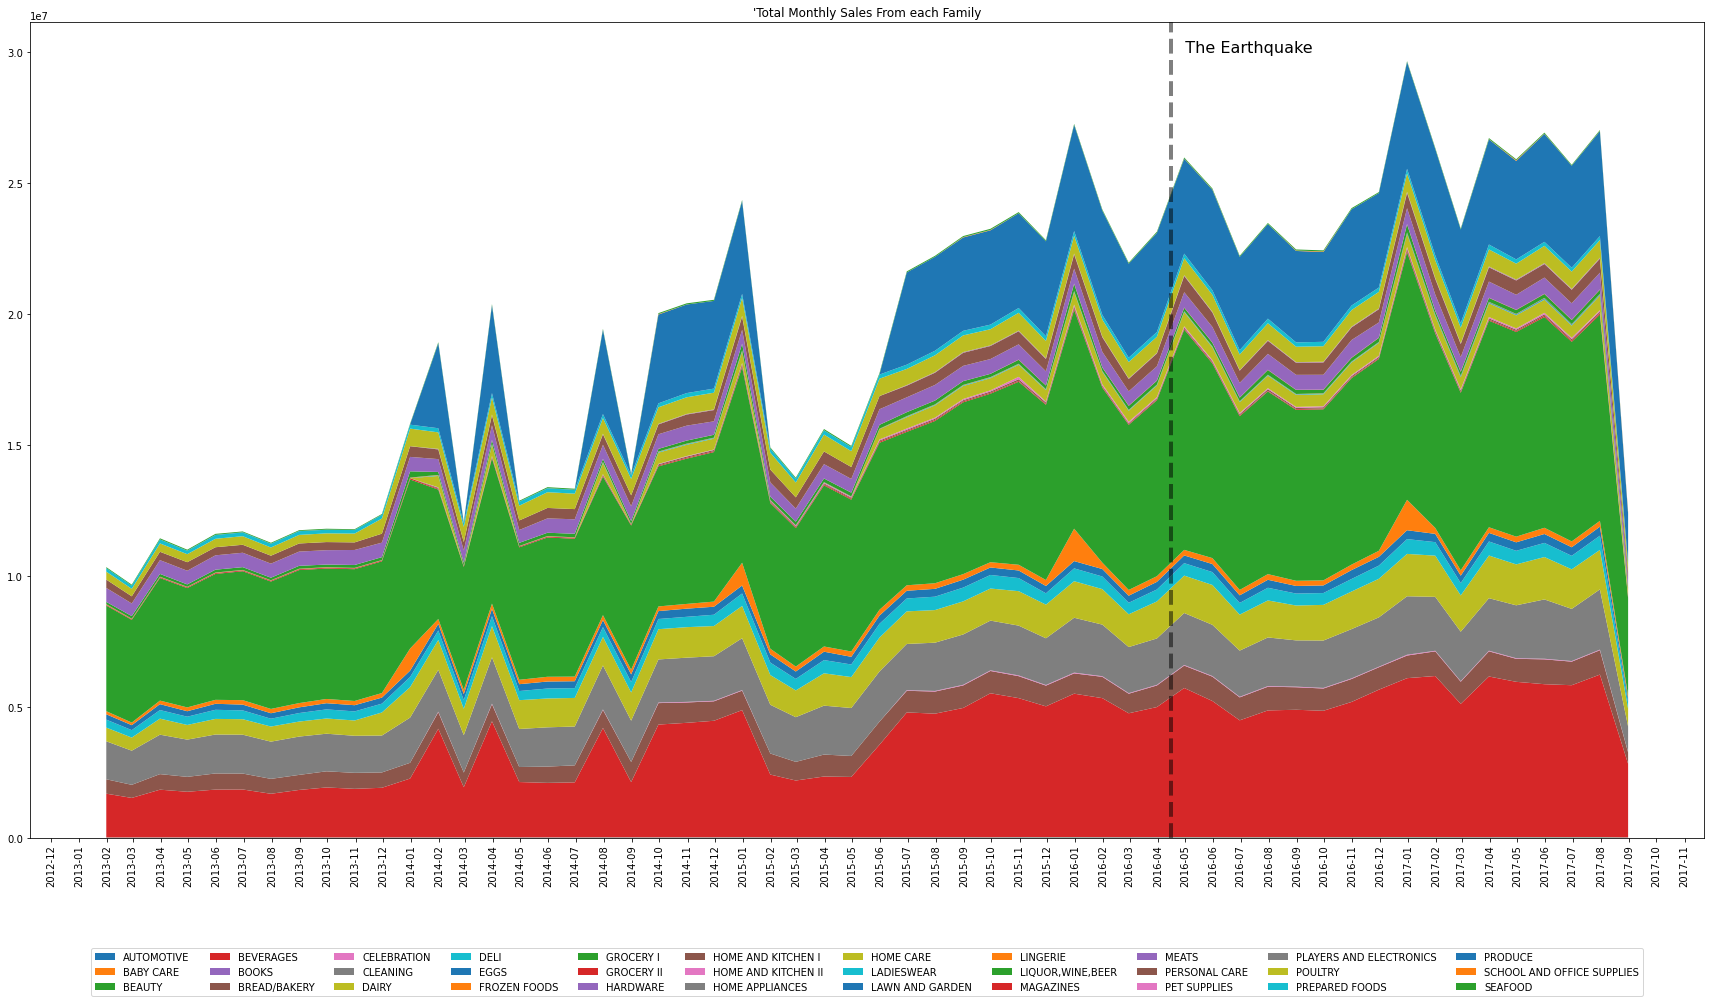

In [20]:
fig, ax = plt.subplots(figsize=(30, 15))
ax.set(title="'Total Monthly Sales From each Family")
plt.stackplot(unstack.index,unstack.T,labels=unstack.T.index)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.axvline(x=pd.Timestamp('2016-04-16'),color='black',linestyle='--',linewidth=4,alpha=0.5)
plt.text(pd.Timestamp('2016-04-20'),30000000,'  The Earthquake',rotation=360,c='black',size=16)
plt.xticks(rotation=90)
plt.legend(loc='lower center',bbox_to_anchor=(0.5,-0.2),ncol=11)
plt.show()

In [22]:
#test test 

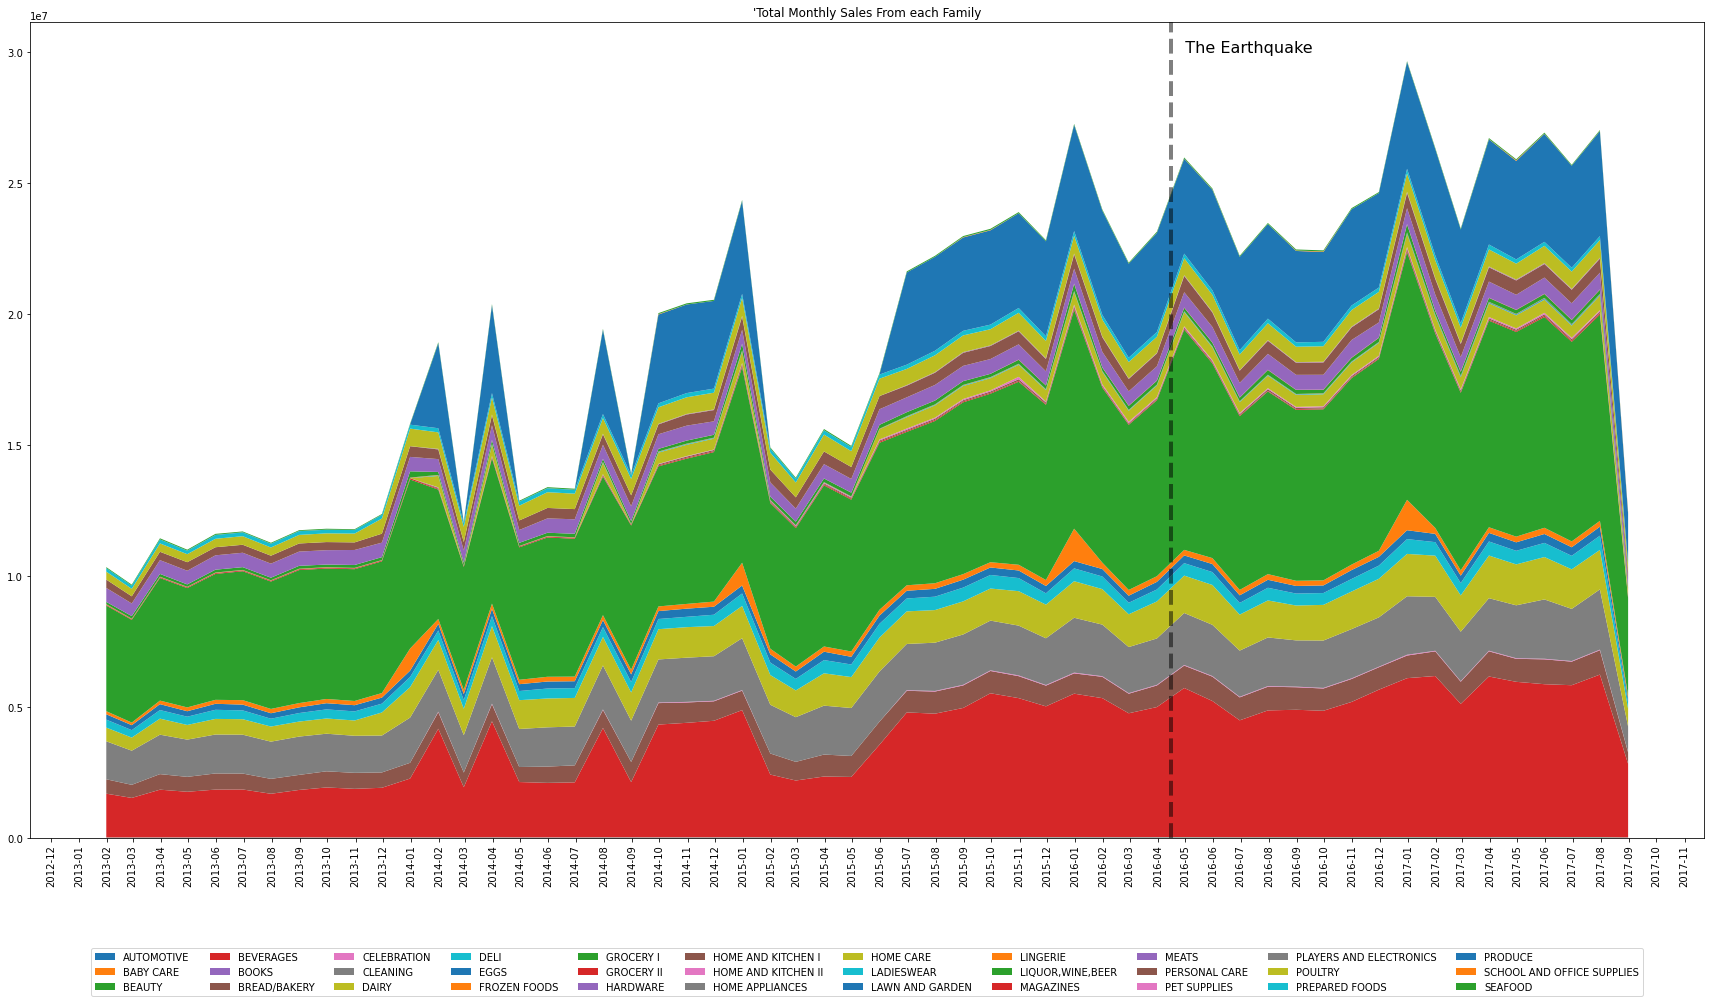

In [23]:
fig, ax = plt.subplots(figsize=(30, 15))
ax.set(title="'Total Monthly Sales From each Family")
plt.stackplot(unstack.index,unstack.T,labels=unstack.T.index)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.axvline(x=pd.Timestamp('2016-04-16'),color='black',linestyle='--',linewidth=4,alpha=0.5)
plt.text(pd.Timestamp('2016-04-20'),30000000,'  The Earthquake',rotation=360,c='black',size=16)
plt.xticks(rotation=90)
plt.legend(loc='lower center',bbox_to_anchor=(0.5,-0.2),ncol=11)
plt.show()

In [24]:
transaction_data

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [27]:
print('bonjour')

bonjour


In [28]:
print('test1')

test1
